## Acceder y preparar los datos para el analisis


In [1]:
# Cargar Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivos
df_costs = pd.read_csv ('costs_us.csv')
df_orders = pd.read_csv ('orders_log_us.csv')
df_visits = pd.read_csv('visits_log_us.csv')

### visualizacion de datos de df_costs

In [46]:
#Visualizamos los datos
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   year       2542 non-null   int32         
 4   month      2542 non-null   int32         
 5   week       2542 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 92.0 KB


In [4]:
print (df_costs.sample(10))

      source_id          dt   costs
2473         10  2018-03-22    9.54
1489          5  2017-07-08   56.80
1871          9  2017-07-26    5.60
180           1  2017-11-28   84.19
1045          3  2018-04-18  330.70
1064          3  2018-05-07  302.21
685           2  2018-04-21   77.12
1471          5  2017-06-20  106.82
479           2  2017-09-25  174.67
1186          4  2017-09-06  263.13


In [5]:
#Convertir la columna de dt en tipo fecha 
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [6]:
# Craemos la columna de año, mes y semana 
df_costs['year'] = pd.to_datetime (df_costs['dt']).dt.year
df_costs['month'] = pd.to_datetime (df_costs['dt']).dt.month
df_costs['week'] = pd.to_datetime (df_costs['dt']).dt.isocalendar().week

df_costs

,source_id,dt,costs,year,month,week
0,1,2017-06-01,75.20,2017,6,22
1,1,2017-06-02,62.25,2017,6,22
2,1,2017-06-03,36.53,2017,6,22
3,1,2017-06-04,55.00,2017,6,22
4,1,2017-06-05,57.08,2017,6,23
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018,5,21
2538,10,2018-05-28,21.26,2018,5,22
2539,10,2018-05-29,11.32,2018,5,22
2540,10,2018-05-30,33.15,2018,5,22


### Trabajamos con el archivo df_orders

In [47]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
 3   year     50415 non-null  int32         
 4   month    50415 non-null  int32         
 5   week     50415 non-null  UInt32        
 6   hour     50415 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), object(1), uint64(1)
memory usage: 2.2+ MB


In [8]:
print(df_orders.sample(10))

                    Buy Ts  Revenue                   Uid
7790   2017-09-14 17:44:00     4.89  11138651850102204552
37586  2018-03-01 17:26:00     7.33  13429177739062814833
992    2017-06-08 14:41:00     0.98   2810945695042643148
26043  2017-12-25 22:40:00     7.13   2420146118979917831
22108  2017-12-05 15:56:00     7.33  12951565684179871614
19770  2017-11-24 21:36:00     0.55  10121483161125280764
21530  2017-12-02 15:37:00     0.82  16502372772018593888
9728   2017-09-29 19:14:00     4.89  13888745432979765063
42472  2018-03-27 21:10:00     2.14   4209385966161366660
22589  2017-12-07 16:26:00     4.89   5379007319062663920


- Cambiamos las columnas en tipo snakecase
- Convertimos las columna Buy ts en tipo date time 
- Separamos los datos por columnas años, mes semana y hora

In [9]:
#Transformamos las columnas en tipo snakecase
df_orders.columns = [x.lower().replace(' ','_') for x in df_orders.columns]

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
#Transformamos el tipo de dato de la columna buy_ts a tipo datetime
df_orders ['buy_ts'] = pd.to_datetime (df_orders['buy_ts'])

In [11]:
#Creamos las comlunas de años, mes , semana y hora

df_orders ['year'] = pd.to_datetime (df_orders['buy_ts']).dt.year
df_orders ['month'] = pd.to_datetime (df_orders['buy_ts']).dt.month
df_orders['week'] = pd.to_datetime ( df_orders['buy_ts']).dt.isocalendar().week
df_orders ['hour'] = pd.to_datetime (df_orders['buy_ts']).dt.time

df_orders

,buy_ts,revenue,uid,year,month,week,hour
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,07:58:00
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,22,23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,22,23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,22,23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,22,23:56:00


### Trabajamos con el archico de df_visits

In [48]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359400 entries, 196543 to 132805
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   device               359400 non-null  object         
 1   end_ts               359400 non-null  datetime64[ns] 
 2   source_id            359400 non-null  int64          
 3   start_ts             359400 non-null  datetime64[ns] 
 4   uid                  359400 non-null  uint64         
 5   duracion_sesion      359400 non-null  float64        
 6   duracion_sesion_min  359400 non-null  float64        
 7   tiempo_regreso       131231 non-null  timedelta64[ns]
 8   tiempo_regreso_dias  131231 non-null  float64        
dtypes: datetime64[ns](2), float64(3), int64(1), object(1), timedelta64[ns](1), uint64(1)
memory usage: 27.4+ MB


In [13]:
df_visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
189454,desktop,2018-03-03 12:21:00,3,2018-03-03 12:11:00,542345714470415800
169486,desktop,2017-10-25 12:49:00,4,2017-10-25 12:49:00,9211333170912674149
357437,desktop,2018-02-26 01:44:00,3,2018-02-26 01:43:00,15058768571855748234
61101,touch,2017-08-29 19:32:00,2,2017-08-29 19:29:00,1243566998273756661
316721,desktop,2017-10-31 10:55:00,4,2017-10-31 10:54:00,5143835512976831620
89400,desktop,2017-11-02 13:02:00,2,2017-11-02 12:57:00,6916757527179896321
280936,desktop,2017-06-20 10:36:00,10,2017-06-20 10:30:00,6926133280784767772
165356,desktop,2017-07-04 23:29:00,4,2017-07-04 23:28:00,4989497479104974897
30893,desktop,2017-09-08 13:40:00,9,2017-09-08 13:22:00,8919603299433204891
99680,desktop,2018-05-28 19:39:00,4,2018-05-28 19:35:00,5639616948694238600


- Convertimos los datos en tipo snakecase
- Transformamos los datos de la columna end ts y star ts en tipo de datos fechas 


In [14]:
#Trnsformamos las columnas en datos de snakecase
df_visits.columns = [x.lower().replace(' ','_') for x in df_visits.columns]

In [15]:
#Transformamos los datos de la columnas end_ts y star_ts en tipo date time 

df_visits ['end_ts'] = pd.to_datetime (df_visits['end_ts'])
df_visits ['start_ts'] = pd.to_datetime(df_visits['start_ts'])

df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


#### En ninguno de los tres archivos existen datos duplicados 

# DF_VISITAS

- ¿Cuántas personas lo usan cada día, semana y mes?

Usuarios por día 

In [16]:
user_per_day = df_visits.groupby(df_visits['end_ts'].dt.date)['uid'].nunique().reset_index()
user_per_day.columns = ['Fecha','Usuarios_por_dia']

user_per_day

,Fecha,Usuarios_por_dia
0,2017-06-01,600
1,2017-06-02,610
2,2017-06-03,444
3,2017-06-04,472
4,2017-06-05,820
...,...,...
360,2018-05-28,1031
361,2018-05-29,956
362,2018-05-30,1281
363,2018-05-31,2000


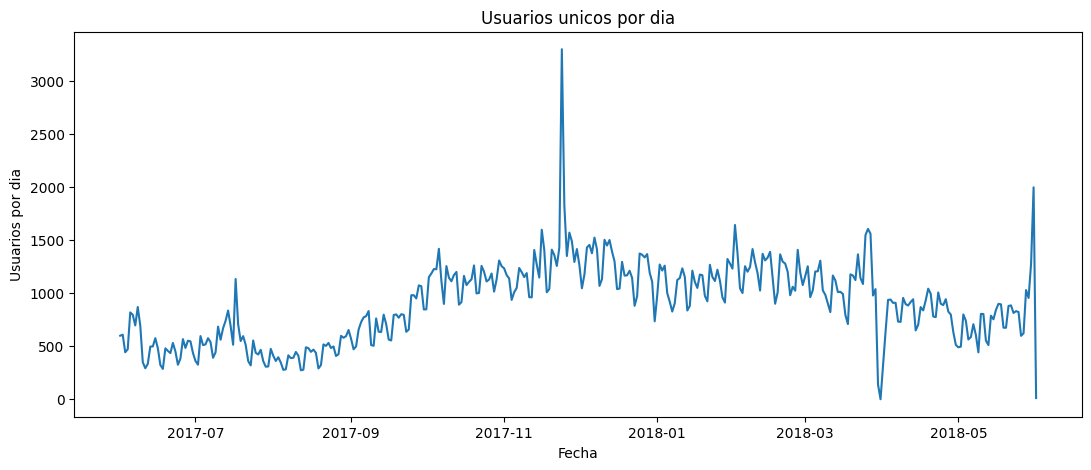

In [17]:
# Creamos un grafico mostrando la informacion 
plt.figure ( figsize=(13,5))
sns.lineplot (x='Fecha', y= 'Usuarios_por_dia', data= user_per_day,)

plt.xlabel ('Fecha')
plt.ylabel ('Usuarios por dia')
plt.title ('Usuarios unicos por dia')
plt.style.use("dark_background")

#Mostrar Grafico
plt.show()

Usuarios por semana

In [18]:
usuarios_por_semana = df_visits.groupby(df_visits['end_ts'].dt.to_period('W'))['uid'].nunique().reset_index()
usuarios_por_semana.columns = ['Semana', 'Usuarios_por_semana']

usuarios_por_semana

,Semana,Usuarios_por_semana
0,2017-05-29/2017-06-04,2015
1,2017-06-05/2017-06-11,4133
2,2017-06-12/2017-06-18,2812
3,2017-06-19/2017-06-25,2877
4,2017-06-26/2017-07-02,3066
5,2017-07-03/2017-07-09,3296
6,2017-07-10/2017-07-16,4357
7,2017-07-17/2017-07-23,3841
8,2017-07-24/2017-07-30,2654
9,2017-07-31/2017-08-06,2366


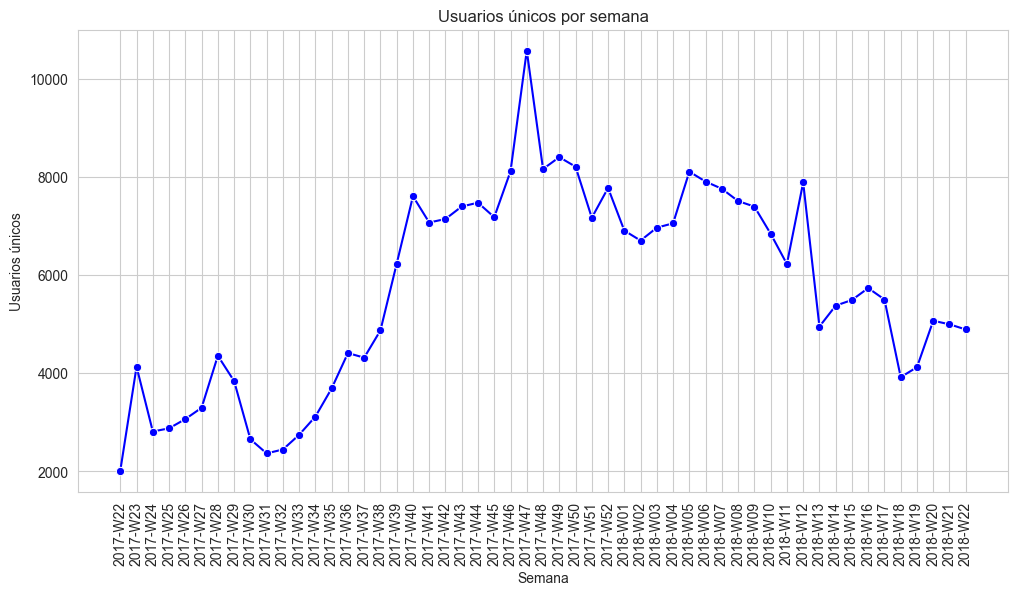

In [19]:
# Convertir las semanas a formato ISO (YYYY-WXX)
usuarios_por_semana['Semana_iso'] = usuarios_por_semana['Semana'].apply(lambda x: x.strftime('%G-W%V'))

# Configurar el estilo de la gráfica
sns.set_style("whitegrid")

# Crear la gráfica de usuarios por semana
plt.figure(figsize=(12, 6))
sns.lineplot(x=usuarios_por_semana['Semana_iso'].astype(str), y=usuarios_por_semana['Usuarios_por_semana'], marker='o', color='b')

# Personalizar la gráfica
plt.xticks(rotation=90)  
plt.xlabel("Semana")
plt.ylabel("Usuarios únicos")
plt.title("Usuarios únicos por semana")
plt.grid(True)

# Mostrar la gráfica
plt.show()

Usuarios por mes 

In [20]:
usuarios_por_mes = df_visits.groupby(df_visits['end_ts'].dt.to_period('M'))['uid'].nunique().reset_index()
usuarios_por_mes.columns = ['Mes', 'Usuarios_por_mes']

usuarios_por_mes

,Mes,Usuarios_por_mes
0,2017-06,13255
1,2017-07,14183
2,2017-08,11631
3,2017-09,18968
4,2017-10,29692
5,2017-11,32798
6,2017-12,31560
7,2018-01,28707
8,2018-02,28755
9,2018-03,27475


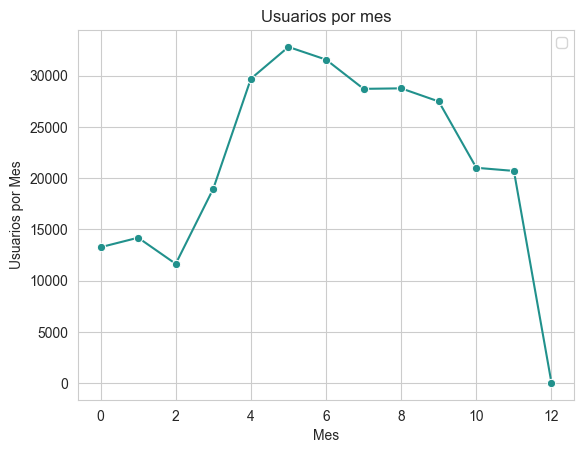

In [21]:
# Configurar el estilo de la gráfica
sns.set_style("whitegrid")
# Crear la gráfica de usuarios por semana
sns.lineplot (data= usuarios_por_mes,marker='o', palette="viridis")
#Personalizar la grafica 


plt.xlabel('Mes')
plt.ylabel('Usuarios por Mes')
plt.grid(True)
plt.title('Usuarios por mes')

plt.legend([])

### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [22]:
# calculamos las sesiones por dia
sesiones_por_dia = df_visits.groupby(df_visits['start_ts'].dt.date).size().reset_index()
sesiones_por_dia.columns = ['Fecha', 'Sesiones_por_dia']

sesiones_por_dia

,Fecha,Sesiones_por_dia
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


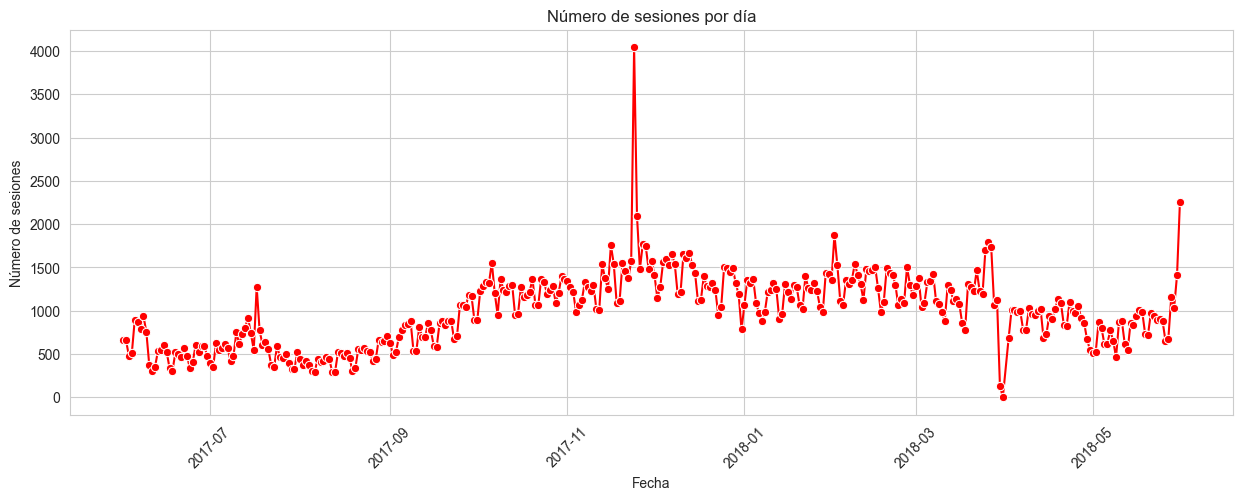

In [23]:
sns.set_style("whitegrid")

# Crear la gráfica de sesiones por día
plt.figure(figsize=(15, 5))
sns.lineplot(x=sesiones_por_dia['Fecha'], y=sesiones_por_dia['Sesiones_por_dia'], marker='o', color='r')

# Personalizar la gráfica
plt.xticks(rotation=45)  
plt.xlabel("Fecha")
plt.ylabel("Número de sesiones")
plt.title("Número de sesiones por día")
plt.grid(True)

# Mostrar la gráfica
plt.show()

¿Cuál es la duración de cada sesión?

In [24]:
#Creamos la columna por segundos de cada sesion 
df_visits['duracion_sesion'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds()
#Agregamos una nueva columna donde este por minutos
df_visits['duracion_sesion_min'] = df_visits['duracion_sesion'] / 60

df_visits

,device,end_ts,source_id,start_ts,uid,duracion_sesion,duracion_sesion_min
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,18.000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,28.000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,0.000000
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,24.000000
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,0.000000
...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,19.0,0.316667
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,19.0,0.316667
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,19.0,0.316667
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,19.0,0.316667


¿Con qué frecuencia los usuarios regresan?

In [25]:

# Ordenar el DataFrame por usuario (uid) y por fecha de inicio de sesión (start_ts)
df_visits = df_visits.sort_values(by=['uid', 'start_ts'])

# Calcular la diferencia en días entre las sesiones consecutivas de cada usuario
df_visits['tiempo_regreso'] = df_visits.groupby('uid')['start_ts'].shift(0) - df_visits.groupby('uid')['start_ts'].shift(1)

# Calcular la diferencia en días 
df_visits['tiempo_regreso_dias'] = df_visits['tiempo_regreso'].dt.days

# Filtrar los datos para eliminar el primer registro de cada usuario 
df_visits_regreso = df_visits.dropna(subset=['tiempo_regreso_dias'])

# Calcular la frecuencia promedio de regreso de los usuarios
promedio_regreso = df_visits_regreso['tiempo_regreso_dias'].mean()

# Mostrar el promedio de regreso
print(f'Promedio de regreso (en días) de los usuarios: {promedio_regreso}')

Promedio de regreso (en días) de los usuarios: 27.67683702783641


# DF VENTAS

¿Cuándo empieza la gente a comprar?

In [26]:

# Encontrar la primera compra de cada usuario
primera_compra = df_orders.groupby('uid')['buy_ts'].min().reset_index()
primera_compra.columns = ['uid', 'primera_compra_ts']

# Unir la primera compra con los registros de los usuarios
df_visits_registro = df_visits[['uid', 'start_ts']]
df_conversiones = pd.merge(df_visits_registro, primera_compra, on='uid', how='left')

# Calcular el tiempo transcurrido entre el registro y la primera compra en días
df_conversiones['tiempo_conversion'] = (df_conversiones['primera_compra_ts'] - df_conversiones['start_ts']).dt.days

# Filtrar solo las conversiones positivas (aquellos usuarios que tienen primera compra)
df_conversiones = df_conversiones[df_conversiones['tiempo_conversion'] >= 0]

# Calcular la cantidad de conversiones por días
conversiones_por_dia = df_conversiones['tiempo_conversion'].value_counts().sort_index().reset_index()
conversiones_por_dia.columns = ['Días de conversión', 'Número de usuarios']

# Mostrar los resultados
top_10 = conversiones_por_dia.sort_values(by='Número de usuarios', ascending=False).reset_index(drop=True).head(10)
top_10


,Días de conversión,Número de usuarios
0,0.0,36813
1,1.0,1763
2,2.0,1000
3,3.0,818
4,4.0,593
5,5.0,499
6,6.0,480
7,7.0,406
8,8.0,341
9,9.0,288


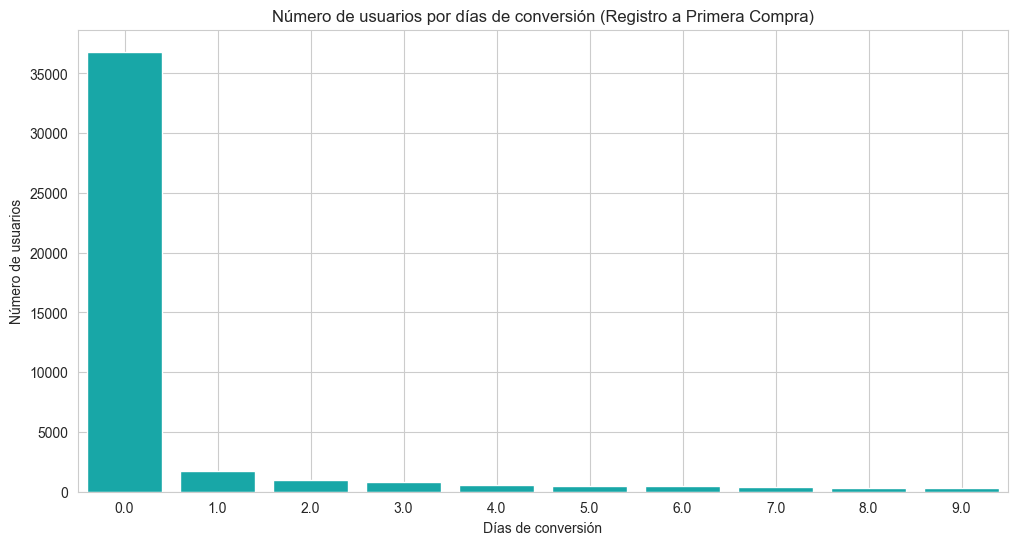

In [27]:
sns.set_style("whitegrid")

# Crear la gráfica de conversiones por días
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10['Días de conversión'], y=top_10['Número de usuarios'], color='c')

# Personalizar la gráfica
plt.xlabel("Días de conversión")
plt.ylabel("Número de usuarios")
plt.title("Número de usuarios por días de conversión (Registro a Primera Compra)")
plt.grid(True)

# Mostrar la gráfica
plt.show()

¿Cuántos pedidos hacen durante un período de tiempo dado?

In [28]:
# Definir el rango de fechas (por ejemplo, entre 2018-01-01 y 2018-03-01)
fecha_inicio = '2018-01-01'
fecha_fin = '2018-03-01'

# Filtrar los pedidos dentro del rango de fechas
pedidos_en_periodo = df_orders[(df_orders['buy_ts'] >= fecha_inicio) & (df_orders['buy_ts'] <= fecha_fin)]

# Contar el número de pedidos en el período
numero_pedidos = pedidos_en_periodo.shape[0]

# Mostrar el resultado
print(f"Número de pedidos entre {fecha_inicio} y {fecha_fin}: {numero_pedidos}")

Número de pedidos entre 2018-01-01 y 2018-03-01: 10002


¿Cuál es el tamaño promedio de compra?

In [29]:
# Calcular el tamaño promedio de compra
tamano_promedio_compra = df_orders['revenue'].mean()

# Mostrar el resultado
print(f"Tamaño promedio de compra: ${tamano_promedio_compra:.2f}")

Tamaño promedio de compra: $5.00


¿Cuánto dinero traen? (LTV)


In [30]:

# Calcular el ingreso total por cliente (sumar todas las compras de un cliente)
ingreso_por_cliente = df_orders.groupby('uid')['revenue'].sum().reset_index()

# Calcular el número de compras por cliente (cuántas veces compró cada usuario)
compras_por_cliente = df_orders.groupby('uid')['buy_ts'].count().reset_index()
compras_por_cliente.columns = ['uid', 'num_compras']

# Unir ambos DataFrames para obtener la información completa
df_ltv = pd.merge(ingreso_por_cliente, compras_por_cliente, on='uid')

# Calcular el LTV por cliente (ingreso total dividido por número de compras)
df_ltv['ltv'] = df_ltv['revenue'] / df_ltv['num_compras']

# Calcular el LTV promedio de todos los clientes
ltv_promedio = df_ltv['ltv'].mean()

# Mostrar el LTV promedio
print(f"LTV promedio por cliente: ${ltv_promedio:.2f}")

LTV promedio por cliente: $4.09


# DF_COSTS

¿Cuánto dinero se gastó? 

- Gasto total

In [31]:
gasto_total = df_costs['costs'].sum()
print(f"Gasto total: ${gasto_total:.2f}")

Gasto total: $329131.62


- ¿Gasto por fuente de adquisicion?


In [32]:
# Calcular el gasto por fuente de adquisición
df_gasto_con_fuente = pd.merge(df_costs, df_visits[['source_id', 'device']], on='source_id', how='left')

gasto_por_fuente_con_nombre = df_gasto_con_fuente.groupby('device')['costs'].sum().reset_index()

# Renombrar la columna para que sea más claro
gasto_por_fuente_con_nombre.columns = ['Fuente de Adquisición', 'Gasto Total']

# Mostrar los resultados

gasto_por_fuente_con_nombre

,Fuente de Adquisición,Gasto Total
0,desktop,1.818299e+10
1,touch,6.476446e+09


C:\Users\Te Amo\AppData\Local\Temp\ipykernel_13108\1640034985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuente de Adquisición', y='Gasto Total', data=gasto_por_fuente_con_nombre, palette='viridis')


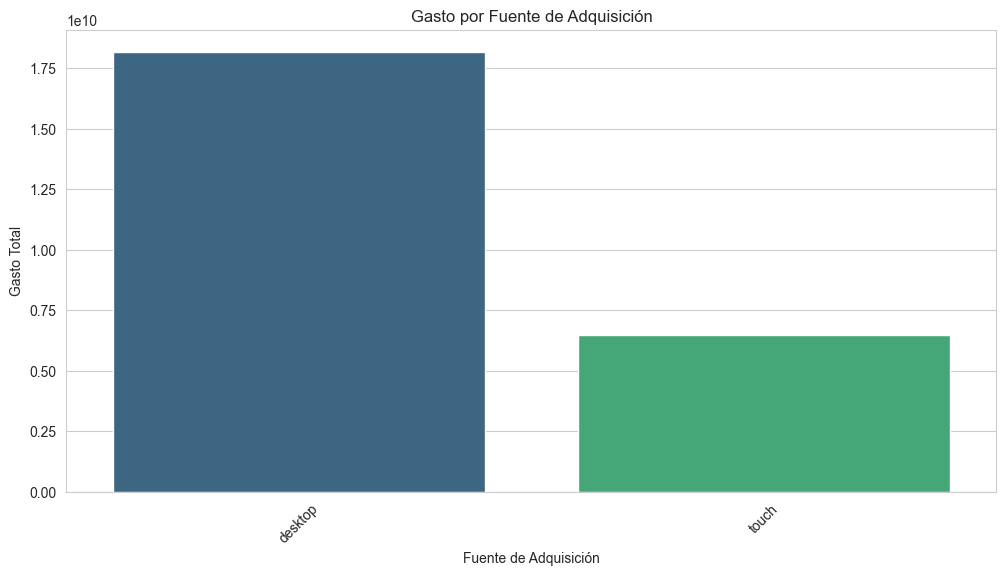

In [33]:
# Gráfico del gasto por fuente de adquisición (con nombres)
plt.figure(figsize=(12, 6))
sns.barplot(x='Fuente de Adquisición', y='Gasto Total', data=gasto_por_fuente_con_nombre, palette='viridis')

# Personalizar la gráfica
plt.xlabel('Fuente de Adquisición')
plt.ylabel('Gasto Total')
plt.title('Gasto por Fuente de Adquisición')
plt.xticks(rotation=45)
plt.show()

- A lo largo del tiempo

In [ ]:
# Calcular el gasto por mes 
gasto_por_mes = df_costs.groupby(['year', 'month'])['costs'].sum().reset_index()
gasto_por_mes.columns = ['Año', 'Mes', 'Gasto Total']
print(gasto_por_mes.head())  

    Año  Mes  Gasto Total
0  2017    6     18015.00
1  2017    7     18240.59
2  2017    8     14790.54
3  2017    9     24368.91
4  2017   10     36322.88


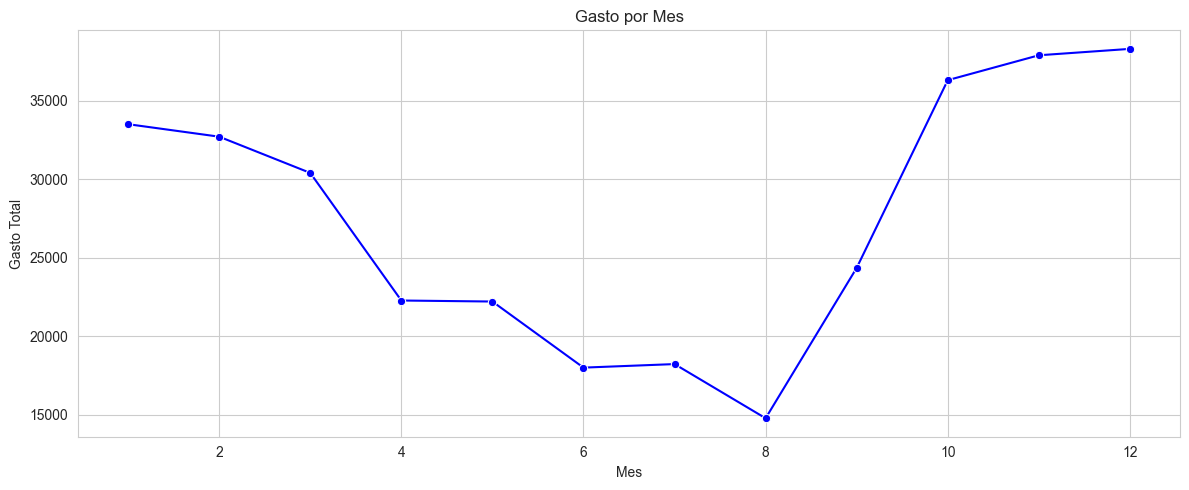

In [41]:
# Crear la gráfica de gasto por mes
plt.figure(figsize=(12, 5))
sns.lineplot(x='Mes', y='Gasto Total', data=gasto_por_mes, marker='o', color='b')

# Personalizar la gráfica
plt.xlabel('Mes')
plt.ylabel('Gasto Total')
plt.title('Gasto por Mes')
plt.tight_layout()
plt.show()

¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [43]:
# Calcular el gasto total por fuente de adquisición 'Fuente de Adquisición', 'Gasto Total'
gasto_por_fuente = df_costs.groupby('source_id')['costs'].sum().reset_index()

# Calcular el número de clientes únicos por fuente de adquisición
clientes_por_fuente = df_visits.groupby('source_id')['uid'].nunique().reset_index()

# Unir ambos DataFrames para obtener el gasto y los clientes
df_cac = pd.merge(gasto_por_fuente, clientes_por_fuente, on='source_id')

# Calcular el CAC (costo de adquisición de clientes) por fuente
df_cac['CAC'] = df_cac['costs'] / df_cac['uid']

# Renombrar las columnas para mayor claridad
df_cac.columns = ['source_id', 'Gasto Total', 'Clientes Adquiridos', 'CAC']

# Mostrar el resultado
print(df_cac[['source_id', 'Gasto Total', 'Clientes Adquiridos', 'CAC']])

   source_id  Gasto Total  Clientes Adquiridos       CAC
0          1     20833.27                18999  1.096546
1          2     42806.04                26245  1.631017
2          3    141321.63                74756  1.890439
3          4     61073.60                83525  0.731201
4          5     51757.10                56974  0.908434
5          9      5517.49                 9264  0.595584
6         10      5822.49                 8067  0.721766


¿Cuán rentables eran las inversiones? (ROMI)

In [50]:
# 1. Asociamos los pedidos de df_orders con la fuente de adquisición en df_visits
# Unimos df_orders con df_visits a través del 'uid' para obtener la fuente de adquisición
df_orders_with_source = pd.merge(df_orders, df_visits[['uid', 'source_id']], on='uid', how='left')

# 2. Calcular los ingresos generados por cada fuente de adquisición (total de revenue por fuente)
ingresos_por_fuente = df_orders_with_source.groupby('source_id')['revenue'].sum().reset_index()

# 3. Calcular el gasto en marketing por fuente (total de costs por fuente)
gasto_por_fuente = df_costs.groupby('source_id')['costs'].sum().reset_index()

# 4. Unir los dos DataFrames: ingresos por fuente y gasto por fuente
df_romi = pd.merge(ingresos_por_fuente, gasto_por_fuente, on='source_id')

# 5. Calcular el ROMI por fuente
df_romi['ROMI'] = ((df_romi['revenue'] - df_romi['costs']) / df_romi['costs']) * 100

# 6. Renombrar las columnas para mayor claridad
df_romi.columns = ['source_id', 'Ingresos Generados', 'Gasto en Marketing', 'ROMI']

# 7. Mostrar el resultado
print(df_romi[['source_id', 'Ingresos Generados', 'Gasto en Marketing', 'ROMI']])



   source_id  Ingresos Generados  Gasto en Marketing          ROMI
0          1          2298200.17            20833.27  10931.394351
1          2          2638189.21            42806.04   6063.123732
2          3           296687.96           141321.63    109.938111
3          4           496690.17            61073.60    713.264930
4          5          1181477.14            51757.10   2182.734427
5          9            36342.25             5517.49    558.673600
6         10            14619.23             5822.49    151.082097


C:\Users\Te Amo\AppData\Local\Temp\ipykernel_13108\2768512473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='ROMI', data=df_romi, palette='viridis')


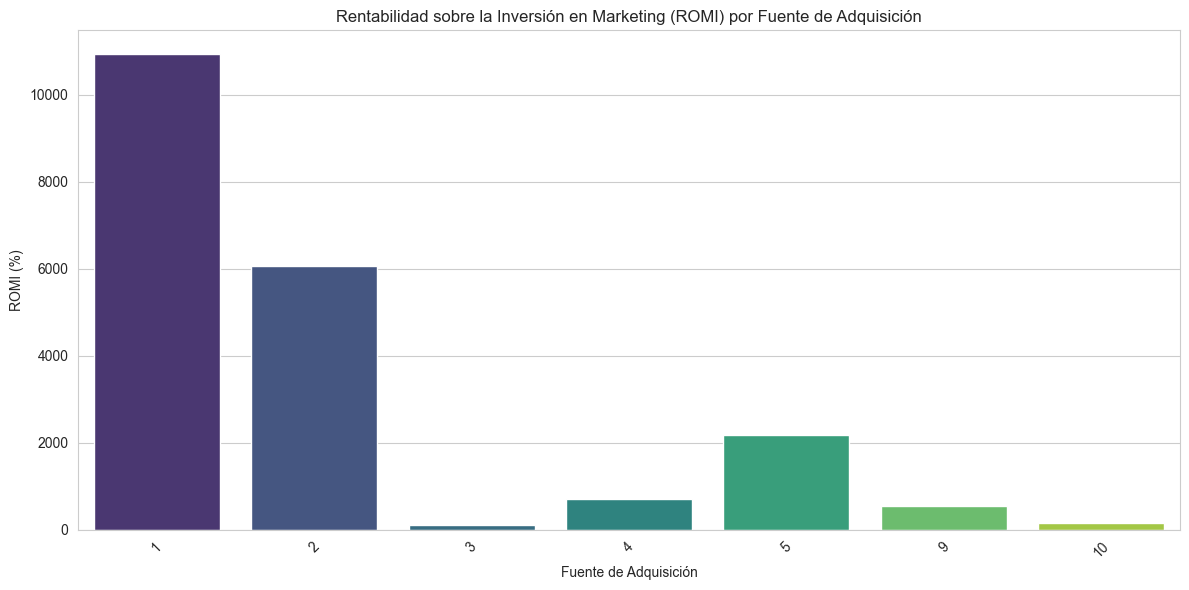

In [51]:
# Gráfico del ROMI por fuente de adquisición
plt.figure(figsize=(12, 6))
sns.barplot(x='source_id', y='ROMI', data=df_romi, palette='viridis')

# Personalizar la gráfica
plt.xlabel('Fuente de Adquisición')
plt.ylabel('ROMI (%)')
plt.title('Rentabilidad sobre la Inversión en Marketing (ROMI) por Fuente de Adquisición')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CONCLUSIONES 


Tras analizar los datos de ingresos y gastos de marketing por fuente de adquisición, y calcular el ROMI de cada fuente, podemos obtener algunas recomendaciones clave sobre en qué fuentes/plataformas invertir para maximizar la rentabilidad.

- Fuentes con ROMI alto: Las fuentes que presentan un ROMI superior al 100% son las que generan más ingresos que lo que se invierte en marketing, lo que indica que están siendo altamente rentables. Estas son las plataformas que debes priorizar, ya que están contribuyendo de manera significativa al retorno de la inversión. Aquí se debería concentrar una mayor parte del presupuesto de marketing.

- Fuentes con ROMI bajo o negativo (menor que 100%): Las fuentes que tienen un ROMI inferior al 100% indican que el gasto en marketing no está generando suficientes ingresos. Si el ROMI es negativo, significa que el dinero invertido en esa fuente está perdiendo valor. En este caso, las plataformas con ROMI bajo o negativo deberían recibir menos inversión o incluso ser descontinuadas, a menos que haya factores cualitativos que puedan justificar una mejora en su desempeño (como cambios de estrategia o mejoras en el targeting).

Se debe priorizar la inversión en aquellas fuentes con ROMI alto (mayor a 100%). Estas fuentes ya están generando un retorno positivo, por lo que asignar más presupuesto puede seguir amplificando los resultados. Si algunas fuentes tienen ingresos altos pero un ROMI ligeramente inferior, aún pueden ser interesantes para mantener, aunque con un enfoque más optimizado.

Las plataformas con ROMI bajo pueden necesitar ajustes antes de continuar con nuevas inversiones, mientras que las plataformas con ROMI alto deben recibir una mayor parte del presupuesto de marketing. Esto puede implicar reorientar la estrategia de marketing hacia las fuentes más rentables y dejar de invertir en aquellas que no están dando resultados.


Con base en los análisis realizados, se recomienda incrementar el presupuesto para las fuentes de adquisición con ROMI alto y optimizar (o reducir la inversión) en aquellas con ROMI bajo. Es fundamental seguir monitorizando estas métricas para asegurarse de que las decisiones tomadas sigan alineadas con el retorno de inversión en el futuro.

En resumen, inviertir más donde ya se están viendo buenos resultados y ajusta o abandona aquellas fuentes que no están siendo rentables a largo plazo
